In [1]:
import time
import numpy as np

import pylab as pl
from IPython.display import display, clear_output
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1=np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

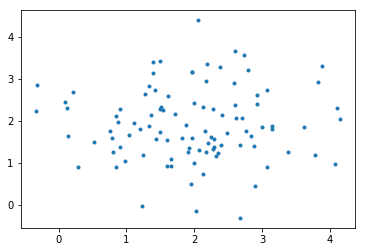

In [6]:
pl.plot(random_2[0], random_2[1],'.')

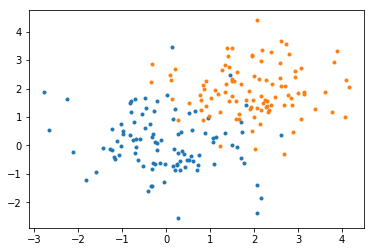

In [7]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')

In [8]:
clusters=2

In [9]:
random_stack = np.hstack([random_1, random_2])

In [10]:
min(random_stack[0]), max(random_stack[0])

centers = np.array([[0.,-1.], [0,-2]]) 
#np.array((np.random.rand(4)   * (max(random_stack[0]) - min(random_stack[0]))) + min(random_stack[0])).reshape(2,2)

Text(0,0.5,u'y')

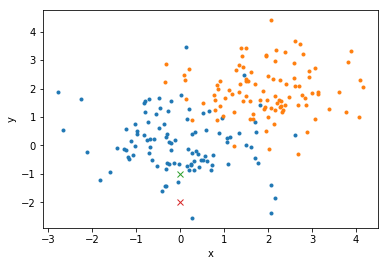

In [11]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')
pl.plot(centers[0,0], centers[0,1],'x')
pl.plot(centers[1,0], centers[1,1],'x')
pl.xlabel('x')
pl.ylabel('y')

In [12]:
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [13]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1),
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
centers, newc

(array([[ 0., -1.],
        [ 0., -2.]]), array([[ 0.96972306,  1.06522176],
        [ 1.02400655, -2.10176012]]))

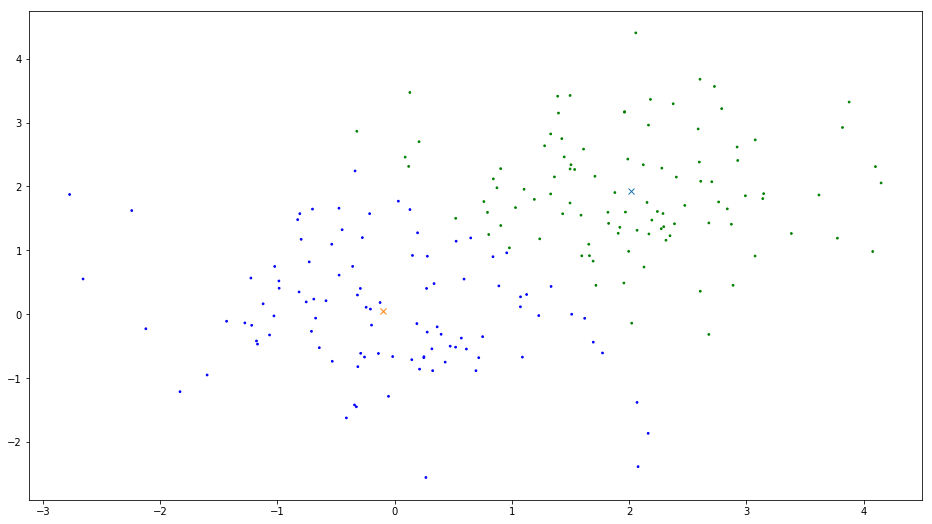

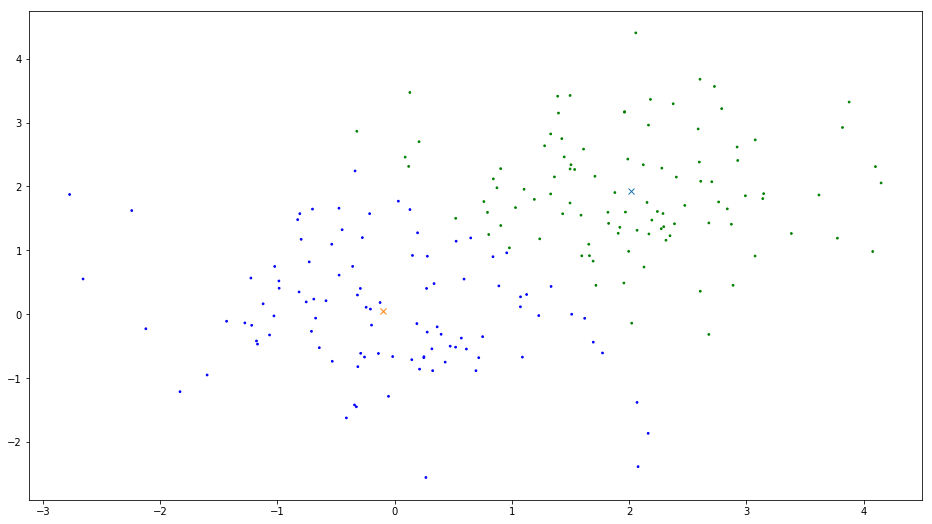

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
stacked_points = np.hstack([random_1, random_2])
stacked_classes = np.hstack([cl1, cl2])
ax.scatter(stacked_points[0, :], stacked_points[1, :], c=stacked_classes, s=4)
ax.plot(centers[0,0], centers[0,1],'x')
ax.plot(centers[1,0], centers[1,1],'x')
display(fig)

for i in xrange(10):
    time.sleep(.5)
    clear_output(wait=True)
    cl1 = distmetric(random_1[0], random_1[1], newc[0]) < distmetric(random_1[0], random_1[1], newc[1])
    cl2 = distmetric(random_2[0], random_2[1], newc[0]) < distmetric(random_2[0], random_2[1], newc[1])
    stacked_classes = np.hstack([cl1, cl2])
    colors = np.array([("green" if c else "blue") for c in stacked_classes])
    ax.clear()
    ax.scatter(stacked_points[0, :], stacked_points[1, :], c=colors, s=3)
    ax.plot(newc[0,0], newc[0,1],'x', linewidth=4)
    ax.plot(newc[1,0], newc[1,1],'x', linewidth=4)
    newc = np.array(
        [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1),
         np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    display(fig)

